In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
reddit_df = pd.read_csv('/home/jeremy/Teaching/intro_to_programming_and_ds/resources/data/100k_random_reddit_2018.csv')
#reddit_df.created_utc = pd.to_datetime(reddit_df.created_utc, unit='s')
#reddit_df = reddit_df.set_index('created_utc')

### Exercise 1

Sort the data frame by score and select the rows with the 10th to 20th highest scores.


In [4]:
df_by_score = reddit_df.sort_values('score', ascending=False)
df_by_score.iloc[9:19]

,created_utc,subreddit,author,comment_length,score
63126,1535693715,madlads,craggolly,80,4827
73188,1538758397,AskReddit,Ankoku_Teion,127,4675
79165,1540552716,gaming,testawayacct,137,4666
1963,1515542877,StarWars,TLM86,162,3959
23011,1522931043,AskReddit,JelloVV,189,3789
64345,1536078182,therewasanattempt,OfficialAlectPrasad,120,3778
88861,1543329669,fo76,honorelove,42,3718
8514,1517871679,videos,Zackmorristhecat,84,3663
77395,1540038919,videos,radioheady,70,3564
96618,1545408372,TwoXChromosomes,Pr2r,303,3562


### Exercise 2

Now, how would you select just the `subreddit` and `comment_length` columns for the rows you selected above?

In [5]:
#df_by_score.iloc[9:19,[1,3]]

df_by_score.iloc[9:19,:].loc[:,['subreddit', 'comment_length']]

,subreddit,comment_length
63126,madlads,80
73188,AskReddit,127
79165,gaming,137
1963,StarWars,162
23011,AskReddit,189
64345,therewasanattempt,120
88861,fo76,42
8514,videos,84
77395,videos,70
96618,TwoXChromosomes,303


### Exercise 3

Find the average (mean) comment length for each subreddit and sort by comment length

In [6]:
reddit_df.groupby('subreddit').comment_length.mean().sort_values()

subreddit
AskTheOuija                1.0
Boilermakers               1.0
im30andthisissheep         1.0
askOuiji                   1.0
FalconsBuccaneerlive       1.0
                         ...  
EnglishOneThirtyOne     6054.0
TheTruthTellers         6214.0
DestructiveReaders      7532.0
NFLstream4kHD           9577.0
NewsBrasil              9720.0
Name: comment_length, Length: 10198, dtype: float64

### Exercise 4

Plot the number of comments and average score. Are frequent posters more likely to share comments that are well-received?

*Hint*: You will want to use a dataframe that groups the data by person

In [7]:
reddit_grouped = reddit_df.groupby('author')

num_comments = reddit_grouped.size()
avg_score = reddit_grouped.score.mean()

person_df = pd.DataFrame({
    'num_comments': num_comments,
    'avg_score': avg_score
})

person_df

,num_comments,avg_score
author,,
---------_---------_,1,1.0
--------__--_---,1,1.0
-----_------_---,1,1.0
-----o____,1,7.0
----Prometheus----,1,2.0
...,...,...
zzoy,1,1.0
zzuum,1,1.0
zzyul,1,1.0


In [8]:
#person_df.sort_values('num_comments')

person_df = person_df.loc[person_df.num_comments < 50,:]

In [9]:
person_df.avg_score + abs(min(person_df.avg_score))

author
---------_---------_    382.0
--------__--_---        382.0
-----_------_---        382.0
-----o____              388.0
----Prometheus----      383.0
                        ...  
zzoy                    382.0
zzuum                   382.0
zzyul                   382.0
zzyzzx2                 382.5
zzzzz94                 387.0
Name: avg_score, Length: 84937, dtype: float64

<ipython-input-10-98d7bde6b439>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  person_df['logged_score'] = np.log1p(person_df.avg_score + abs(min(person_df.avg_score)))
/home/jeremy/mambaforge/envs/teaching/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


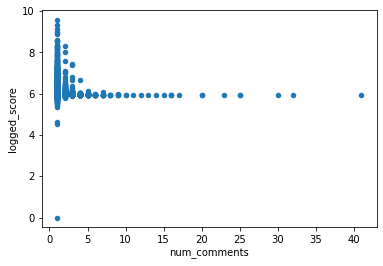

In [10]:
import numpy as np
person_df['logged_score'] = np.log1p(person_df.avg_score + abs(min(person_df.avg_score)))

person_df
person_df.plot.scatter(x = 'num_comments', y = 'logged_score');

### Exercise 5

Plot the number of comments per month over the year.

In [11]:
reddit_df.head()

,created_utc,subreddit,author,comment_length,score
0,1514764841,Astronomy,illuminatiisnowhere,50,3
1,1514764972,politics,ExtracurricularSpork,31,10
2,1514765017,frugalmalefashion,TheBarnhouseEffect,126,5
3,1514765217,KansasCityChiefs,thenewguyreddit,48,5
4,1514765360,Aeon,ribnag,385,1


In [18]:
reddit_df['datetime'] = pd.to_datetime(reddit_df.created_utc, unit='s')

In [19]:
reddit_df.head()

,created_utc,subreddit,author,comment_length,score,datetime
created_utc,,,,,,
2018-01-01 00:00:41,1514764841,Astronomy,illuminatiisnowhere,50,3,2018-01-01 00:00:41
2018-01-01 00:02:52,1514764972,politics,ExtracurricularSpork,31,10,2018-01-01 00:02:52
2018-01-01 00:03:37,1514765017,frugalmalefashion,TheBarnhouseEffect,126,5,2018-01-01 00:03:37
2018-01-01 00:06:57,1514765217,KansasCityChiefs,thenewguyreddit,48,5,2018-01-01 00:06:57
2018-01-01 00:09:20,1514765360,Aeon,ribnag,385,1,2018-01-01 00:09:20


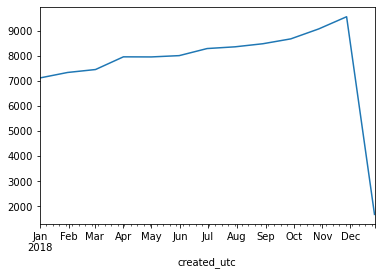

In [38]:
reddit_df.resample('30D').size().plot();

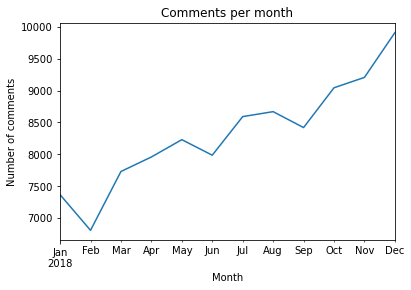

In [39]:
reddit_df.resample('M').size().plot();
plt.title('Comments per month');
plt.xlabel('Month');
plt.ylabel('Number of comments');

### Exercise 6

See if you can figure out how to change the above plot so that instead of showing one overall line for comments per hour, it shows a line for each day of the week (e.g., a line for comments per hour on Mondays, another for Tuesdays, etc.).

This code can help you to get started: it sums the number of comments by hour and day.

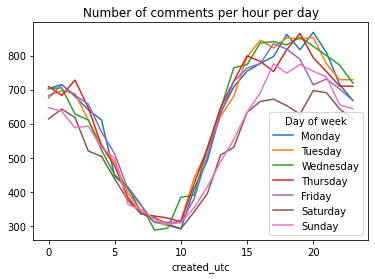

In [55]:
reddit_df.groupby([reddit_df.index.hour, reddit_df.index.day_of_week]).size().unstack().plot();
plt.title('Number of comments per hour per day')
plt.legend(title='Day of week', labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])